# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [9]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

In [10]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [11]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!

file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [12]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    
grouped_df = sfo_data['housing_units']

units_by_year_df = grouped_df.groupby(by = 'year').mean()

units_by_year_df

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [13]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    
grouped_df_2 = sfo_data[['sale_price_sqr_foot','gross_rent']]

sales_rent_df = grouped_df_2.groupby(by = 'year').mean()

sales_rent_df

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [14]:
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    
hood_mean_df = sfo_data.groupby(by = 'neighborhood').mean()

sorted_hood_df = hood_mean_df.sort_values(by = 'sale_price_sqr_foot', ascending = False)

high_price_df = sorted_hood_df[0:9]

high_price_df

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [15]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    
sales_prices = sfo_data.groupby(by = ['year','neighborhood']).mean()

sales_prices.drop(['housing_units','gross_rent'], axis = 1, inplace = True)

sales_prices

sale_price_sqr_foot
year neighborhood                               
2010 Alamo Square                     291.182945
     Anza Vista                       267.932583
     Bayview                          170.098665
     Buena Vista Park                 347.394919
     Central Richmond                 319.027623
...                                          ...
2016 Telegraph Hill                   903.049771
     Twin Peaks                       970.085470
     Van Ness/ Civic Center           552.602567
     Visitacion Valley                328.319007
     Westwood Park                    631.195426

[397 rows x 1 columns]

In [16]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!
    
sorted_hood_df = hood_mean_df.sort_values(by = 'sale_price_sqr_foot', ascending = False)

high_price_df = sorted_hood_df[0:9]

high_price_df

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [17]:
def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!


    

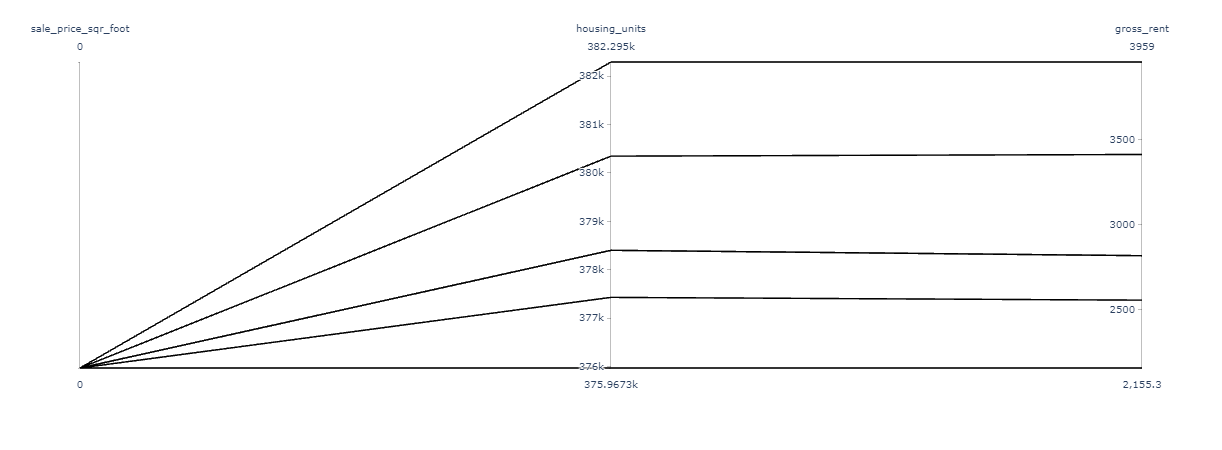

In [36]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!
    
px.parallel_coordinates(high_price_df, color = 'sale_price_sqr_foot')

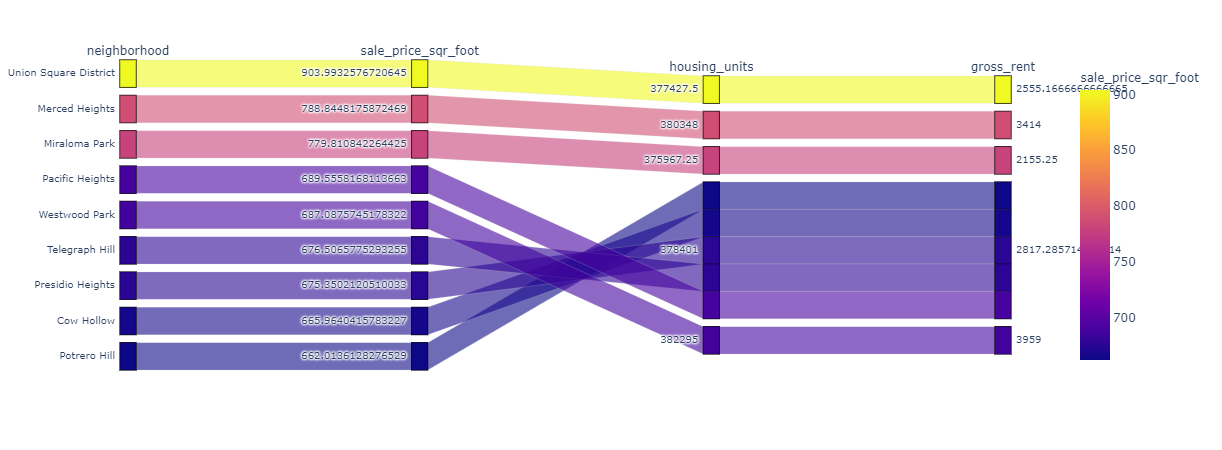

In [37]:
def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    
high_price_df_reset = high_price_df.reset_index()

px.parallel_categories(high_price_df_reset, color = 'sale_price_sqr_foot')

In [20]:
def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!

In [21]:
def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [22]:
# Create a Title for the Dashboard
# YOUR CODE HERE!


# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the dashboard
# YOUR CODE HERE!

## Serve the Panel Dashboard

In [23]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [24]:
# housing_units_per_year()

In [25]:
# average_gross_rent()

In [26]:
# average_sales_price()

In [27]:
# average_price_by_neighborhood()

In [28]:
# top_most_expensive_neighborhoods()

In [29]:
# most_expensive_neighborhoods_rent_sales()

In [30]:
# neighborhood_map().show()

In [31]:
# parallel_categories()

In [32]:
# parallel_coordinates()

In [33]:
# sunburst()